# Auswertung der stündlichen Luftschadstoffdaten

Auswertung der [Stundenwerte der Luftschadstoffdaten](https://data.stadt-zuerich.ch/dataset/luftqualitaet-stunden-aktuelle-messungen). Die hier verwendete Datei ist vom 6.1.2020, d.h. die Silvesternacht ist darin enthalten.

**Können wir in den Messdaten erhöhte Feinstaub-Werte feststellen?**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show, reset_output
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral4

## Daten lesen und aufbereiten

In [3]:
# luftqualitätsmessung ostluft (last seven days)
#data = pd.read_csv('http://ogd.zueriluft.ch/api/v1/h1.csv', sep=';', encoding='ansi', header=[0,1,2,3,4,5], parse_dates=[0])
data = pd.read_csv('stundenwerte.csv', sep=';', skipinitialspace=True, encoding='ansi', header=[0,1,2,3,4,5], parse_dates=[0], dayfirst=True)
data

Datum Zürich Stampfenbachstrasse                   \
     Unnamed: 0_level_1    Zch_Stampfenbachstrasse                    
     Unnamed: 0_level_2                       Ozon Stickstoffdioxid   
     Unnamed: 0_level_3                         O3              NO2   
     Unnamed: 0_level_4                         h1               h1   
     Unnamed: 0_level_5                      µg/m3            µg/m3   
0   2019-12-30 08:00:00                       5.03            37.62   
1   2019-12-30 09:00:00                       7.06            37.33   
2   2019-12-30 10:00:00                       7.58            39.45   
3   2019-12-30 11:00:00                      10.18            34.72   
4   2019-12-30 12:00:00                       9.65            37.20   
5   2019-12-30 13:00:00                      11.65            34.99   
6   2019-12-30 14:00:00                      12.72            28.72   
7   2019-12-30 15:00:00                      12.88            27.40   
8   2019-12-30 16:00:00                       8.41            31.85   
9   2019-12-30 17:00:00                       3.01            38.63   
10  2019-12-30 18:00:00                       2.01            40.43   
11  2019-12-30 19:00:00                       1.59            39.59   
12  2019-12-30 20:00:00                       1.97            37.67   
13  2019-12-30 21:00:00                       4.26            33.57   
14  2019-12-30 22:00:00                       4.87            32.42   
15  2019-12-30 23:00:00                       5.24            30.94   
16  2019-12-31 00:00:00                       5.03            29.78   
17  2019-12-31 01:00:00                       5.57            27.73   
18  2019-12-31 02:00:00                       3.43            27.65   
19  2019-12-31 03:00:00                       2.28            27.62   
20  2019-12-31 04:00:00                       2.13            27.25   
21  2019-12-31 05:00:00                       2.83            27.99   
22  2019-12-31 06:00:00                       1.99            30.83   
23  2019-12-31 07:00:00                       1.67            33.73   
24  2019-12-31 08:00:00                       2.25            32.18   
25  2019-12-31 09:00:00                       4.14            28.34   
26  2019-12-31 10:00:00                       4.96            29.96   
27  2019-12-31 11:00:00                       6.47            28.10   
28  2019-12-31 12:00:00                       7.07            29.10   
29  2019-12-31 13:00:00                       7.88            30.91   
..                  ...                        ...              ...   
138 2020-01-05 02:00:00                      36.31            28.44   
139 2020-01-05 03:00:00                      27.00            36.52   
140 2020-01-05 04:00:00                      30.02            30.31   
141 2020-01-05 05:00:00                      11.76            42.79   
142 2020-01-05 06:00:00                      20.02            37.66   
143 2020-01-05 07:00:00                      12.59            41.29   
144 2020-01-05 08:00:00                       5.60            43.61   
145 2020-01-05 09:00:00                       9.34            46.00   
146 2020-01-05 10:00:00                      21.18            33.02   
147 2020-01-05 11:00:00                      27.99            31.38   
148 2020-01-05 12:00:00                      42.19            25.61   
149 2020-01-05 13:00:00                      54.41            13.88   
150 2020-01-05 14:00:00                      55.28            17.90   
151 2020-01-05 15:00:00                      55.13            18.27   
152 2020-01-05 16:00:00                      52.91            21.51   
153 2020-01-05 17:00:00                      36.51            38.16   
154 2020-01-05 18:00:00                      14.35            57.35   
155 2020-01-05 19:00:00                       6.10            64.94   
156 2020-01-05 20:00:00                       4.49            62.90   
157 2020-01-05 21:00:00                   

In [4]:
stampf_data = data[['Datum', 'Zürich Stampfenbachstrasse']]

# get rid of multiple levels and add column for station
stampf_data.columns = ["Datum", "Ozon", "Stickstoffdioxid", "Feinstaub PM10", "Lufttemperatur", "Luftdruck", "Windrichtung", "Windgeschwindigkeit vektoriell"]
stampf_data = stampf_data.assign(Station='Zürich Stampfenbachstrasse')

schimmel_data = data[['Datum', 'Zürich Schimmelstrasse']]

# get rid of multiple levels and add column for station
schimmel_data.columns = ["Datum", "Ozon", "Stickstoffdioxid", "Feinstaub PM10"]
schimmel_data = schimmel_data.assign(Station='Zürich Schimmelstrasse')

rosengarten_data = data[['Datum', 'Zürich Rosengartenstrasse']]

# get rid of multiple levels and add column for station
rosengarten_data.columns = ["Datum", "Ozon", "Stickstoffdioxid", "Feinstaub PM10"]
rosengarten_data = rosengarten_data.assign(Station='Zürich Rosengartenstrasse')

heubeeri_data = data[['Datum', 'Zürich Heubeeribüel']]

# get rid of multiple levels and add column for station
heubeeri_data.columns = ["Datum", "Ozon", "Stickstoffdioxid"]
heubeeri_data = heubeeri_data.assign(Station='Zürich Heubeeribüel')

all_data = pd.concat([stampf_data, schimmel_data, rosengarten_data, heubeeri_data], sort=False)
all_data

,Datum,Ozon,Stickstoffdioxid,Feinstaub PM10,Lufttemperatur,Luftdruck,Windrichtung,Windgeschwindigkeit vektoriell,Station
0,2019-12-30 08:00:00,5.03,37.62,24.51,-0.47,982.85,55.45,1.01,Zürich Stampfenbachstrasse
1,2019-12-30 09:00:00,7.06,37.33,25.21,-0.28,983.07,32.42,0.70,Zürich Stampfenbachstrasse
2,2019-12-30 10:00:00,7.58,39.45,27.22,-0.09,983.22,40.13,0.60,Zürich Stampfenbachstrasse
3,2019-12-30 11:00:00,10.18,34.72,27.49,0.10,982.95,280.25,0.39,Zürich Stampfenbachstrasse
4,2019-12-30 12:00:00,9.65,37.20,28.72,0.68,982.43,298.61,0.39,Zürich Stampfenbachstrasse
5,2019-12-30 13:00:00,11.65,34.99,30.55,1.15,981.70,290.49,0.33,Zürich Stampfenbachstrasse
6,2019-12-30 14:00:00,12.72,28.72,28.64,1.34,981.36,296.77,0.41,Zürich Stampfenbachstrasse
7,2019-12-30 15:00:00,12.88,27.40,24.19,1.40,981.37,301.21,0.92,Zürich Stampfenbachstrasse
8,2019-12-30 16:00:00,8.41,31.85,23.38,0.89,981.41,303.83,0.88,Zürich Stampfenbachstrasse
9,2019-12-30 17:00:00,3.01,38.63,24.22,0.92,981.45,311.72,0.43,Zürich Stampfenbachstrasse


In [5]:
# get all data from one point in time
all_data[all_data.Datum == '2019-12-30 08:00:00']

,Datum,Ozon,Stickstoffdioxid,Feinstaub PM10,Lufttemperatur,Luftdruck,Windrichtung,Windgeschwindigkeit vektoriell,Station
0,2019-12-30 08:00:00,5.03,37.62,24.51,-0.47,982.85,55.45,1.01,Zürich Stampfenbachstrasse
0,2019-12-30 08:00:00,2.98,45.48,29.35,NaN,NaN,NaN,NaN,Zürich Schimmelstrasse
0,2019-12-30 08:00:00,3.16,41.08,27.36,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
0,2019-12-30 08:00:00,8.62,24.86,NaN,NaN,NaN,NaN,NaN,Zürich Heubeeribüel


In [6]:
# get all data from one station
all_data[all_data.Station == 'Zürich Rosengartenstrasse']

,Datum,Ozon,Stickstoffdioxid,Feinstaub PM10,Lufttemperatur,Luftdruck,Windrichtung,Windgeschwindigkeit vektoriell,Station
0,2019-12-30 08:00:00,3.16,41.08,27.36,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
1,2019-12-30 09:00:00,5.03,39.91,27.99,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
2,2019-12-30 10:00:00,7.43,40.36,27.88,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
3,2019-12-30 11:00:00,7.55,41.99,28.61,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
4,2019-12-30 12:00:00,6.42,44.96,30.45,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
5,2019-12-30 13:00:00,7.80,44.19,30.20,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
6,2019-12-30 14:00:00,9.08,37.70,27.27,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
7,2019-12-30 15:00:00,9.86,36.39,24.46,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
8,2019-12-30 16:00:00,3.68,42.44,25.05,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse
9,2019-12-30 17:00:00,2.34,41.52,25.95,NaN,NaN,NaN,NaN,Zürich Rosengartenstrasse


## Daten für jede Messstation

In [7]:
# prepare the data
start = '2019-12-30 18:00:00'
end = '2020-01-06 23:00:00'

mean = all_data[(all_data['Datum'] >= start) & (all_data['Datum'] <= end)].groupby('Datum').mean().reset_index()
rosengarten = all_data[(all_data['Station'] == 'Zürich Rosengartenstrasse') & (all_data['Datum'] >= start) & (all_data['Datum'] <= end)]
stampf = all_data[(all_data['Station'] == 'Zürich Stampfenbachstrasse') & (all_data['Datum'] >= start) & (all_data['Datum'] <= end)]
schimmel = all_data[(all_data['Station'] == 'Zürich Schimmelstrasse') & (all_data['Datum'] >= start) & (all_data['Datum'] <= end)]

## Matplotlib

In [8]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [9]:
# to use different styles, make sure to reload the default to always get clean results
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

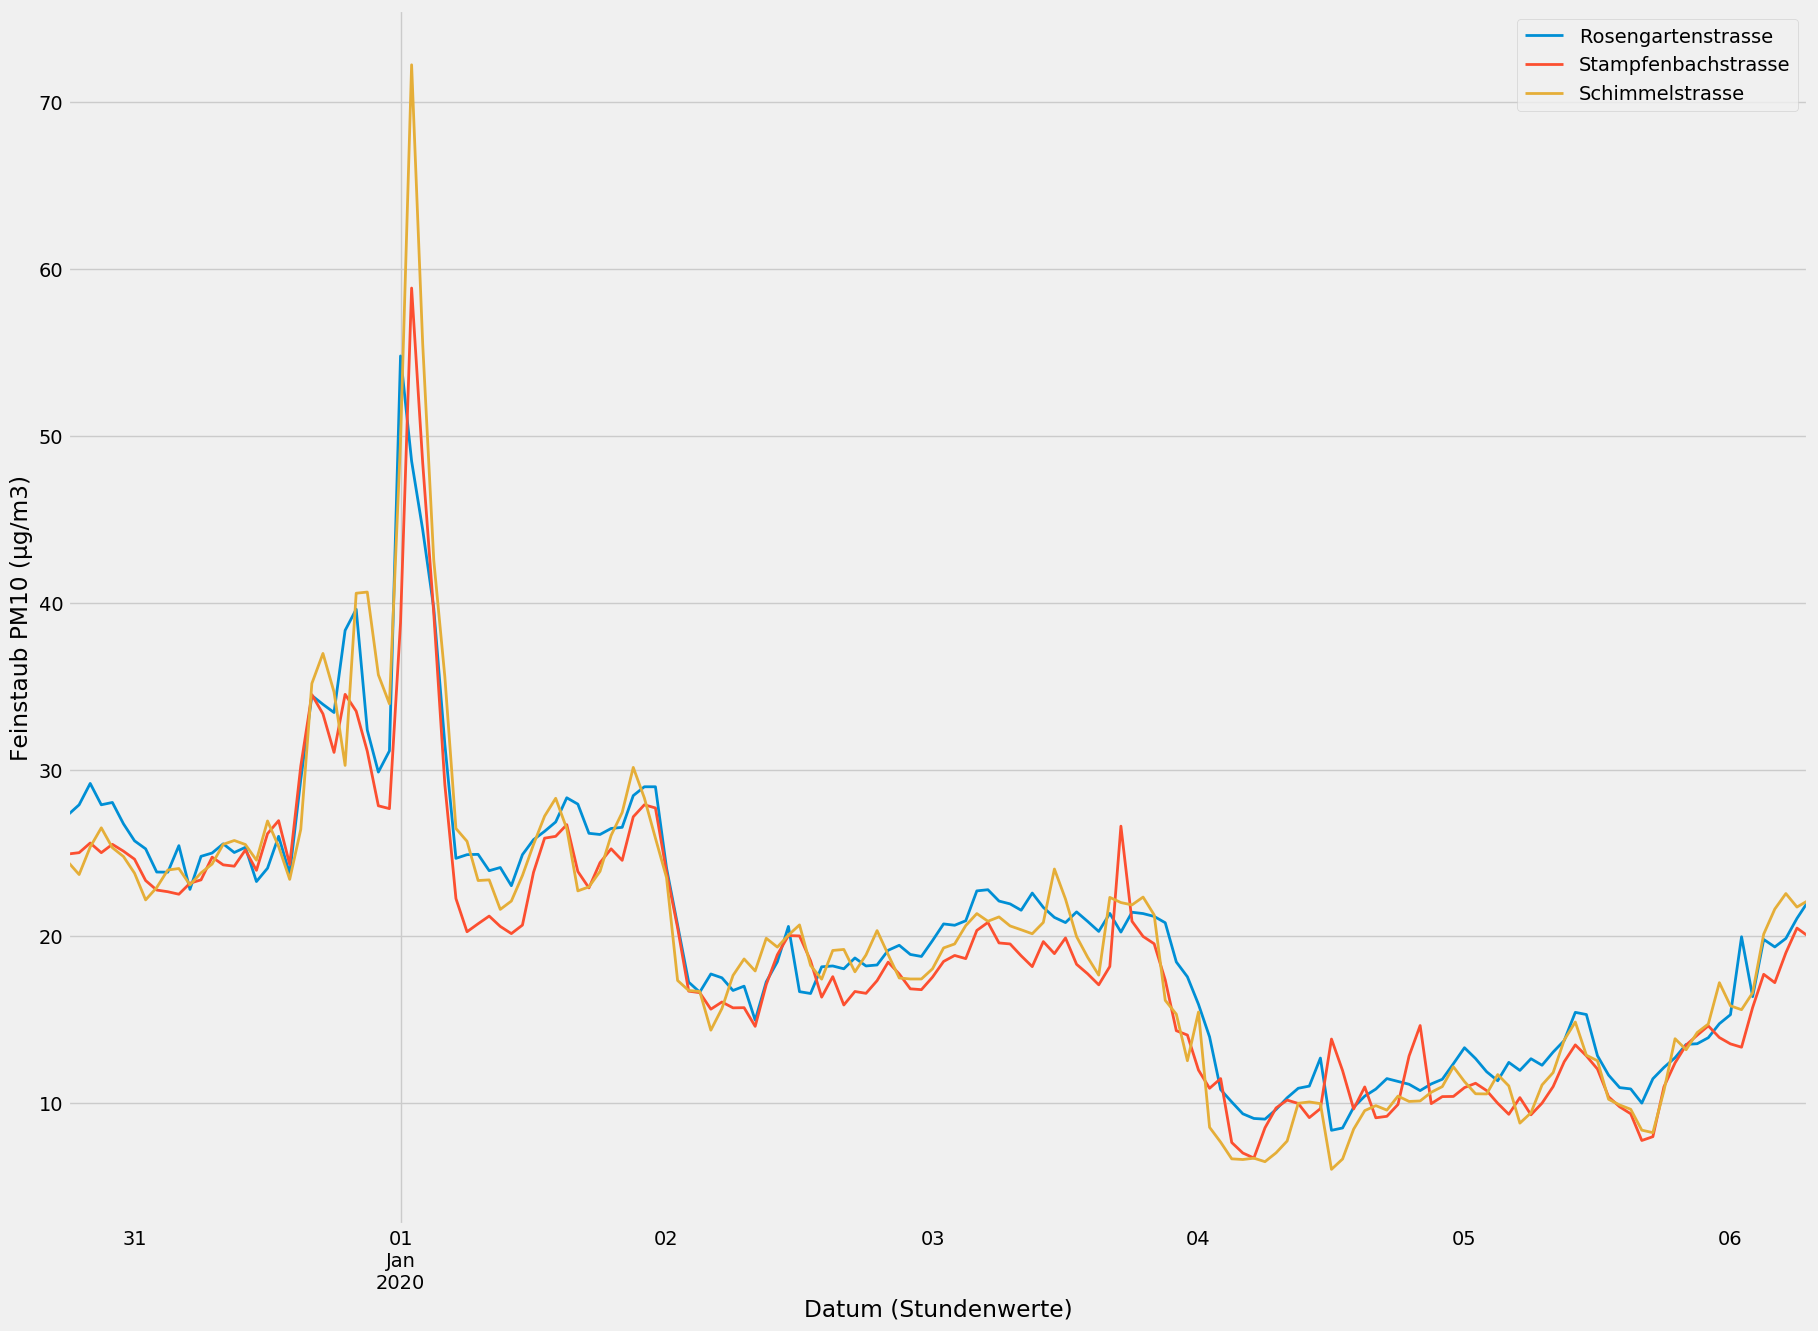

In [10]:
# feinstaub over time
use_style('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,15))

linewidth = 2

rosengarten.plot(kind='line', y='Feinstaub PM10', x='Datum', label="Rosengartenstrasse", ax=ax, linewidth=linewidth)
stampf.plot(kind='line', y='Feinstaub PM10', x='Datum', label="Stampfenbachstrasse", ax=ax, linewidth=linewidth)
schimmel.plot(kind='line', y='Feinstaub PM10', x='Datum', label="Schimmelstrasse", ax=ax, linewidth=linewidth)

ax.set_ylabel('Feinstaub PM10 (µg/m3)')
ax.set_xlabel('Datum (Stundenwerte)')

plt.show()

**Fazit:** Man sieht sehr schön den Peak kurz nach Mitternacht an Neujahr mit dem Feuerwerk.

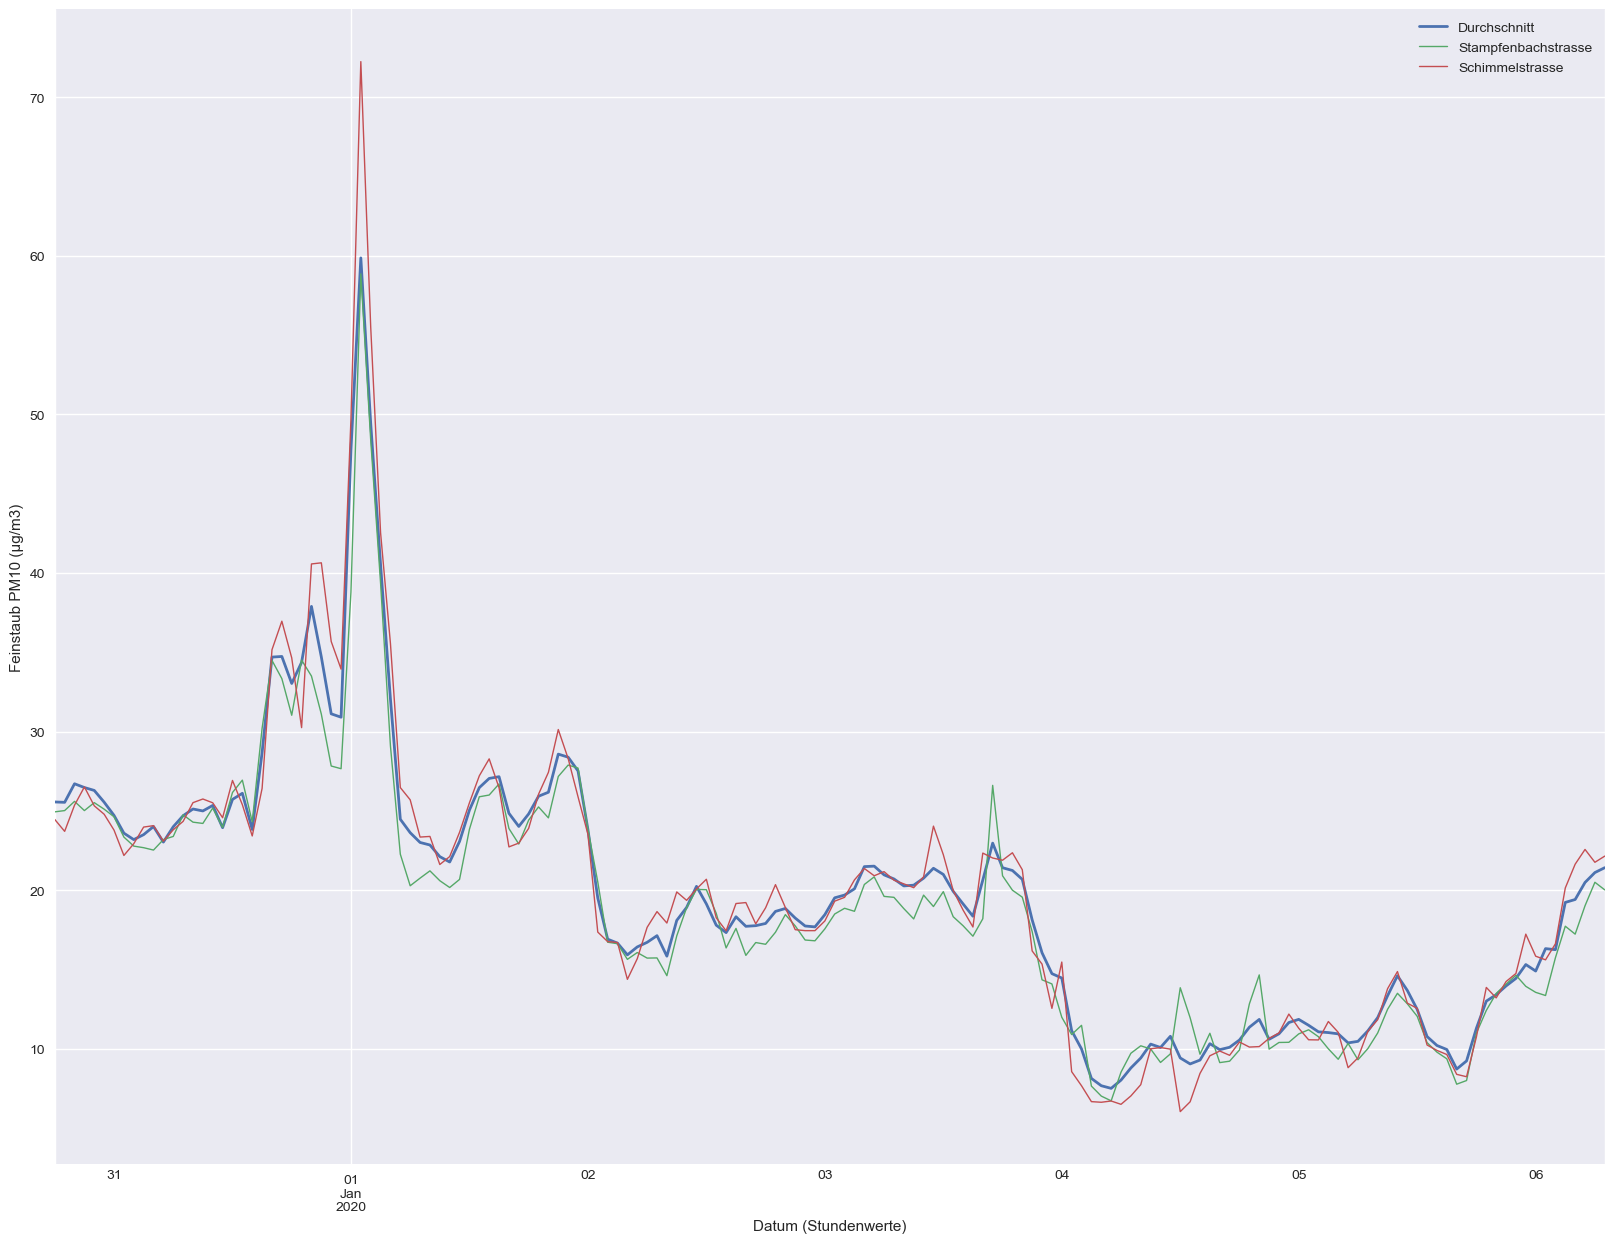

In [11]:
# Durschnittswerte anzeigen (über alle Messstationen)
use_style('seaborn')
fig, ax = plt.subplots(figsize=(20,15))

mean.plot(kind='line', y='Feinstaub PM10', x='Datum', label="Durchschnitt", ax=ax, linewidth=(linewidth))
stampf.plot(kind='line', y='Feinstaub PM10', x='Datum', label="Stampfenbachstrasse", ax=ax, linewidth=linewidth*0.5)
schimmel.plot(kind='line', y='Feinstaub PM10', x='Datum', label="Schimmelstrasse", ax=ax, linewidth=linewidth*0.5)

ax.set_ylabel('Feinstaub PM10 (µg/m3)')
ax.set_xlabel('Datum (Stundenwerte)')

plt.show()

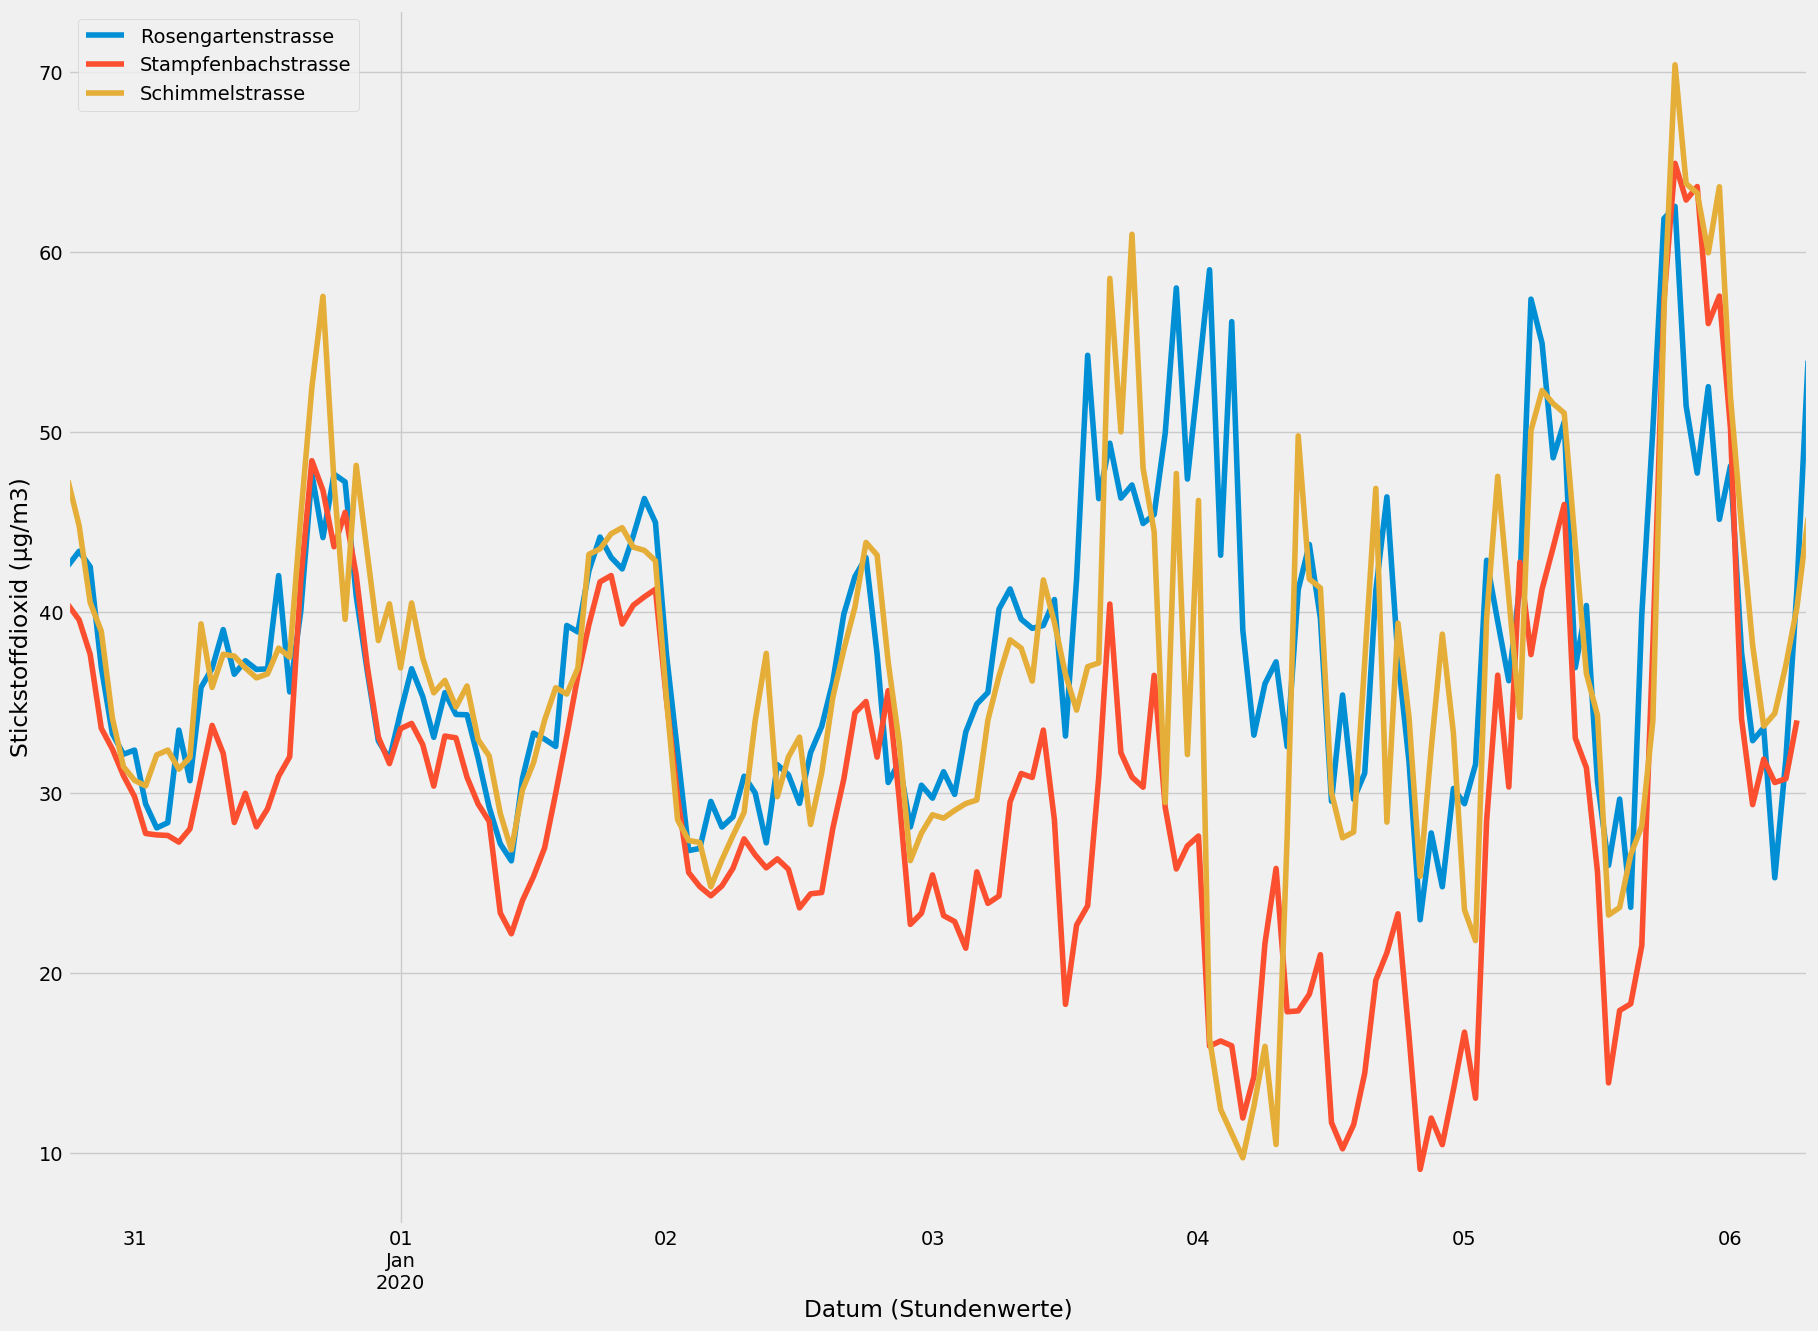

In [12]:
# Stickstoffdioxid over time
use_style('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,15))

value = 'Stickstoffdioxid'

rosengarten.plot(kind='line', y=value, x='Datum', label="Rosengartenstrasse", ax=ax)
stampf.plot(kind='line', y=value, x='Datum', label="Stampfenbachstrasse", ax=ax)
schimmel.plot(kind='line', y=value, x='Datum', label="Schimmelstrasse", ax=ax)

ax.set_ylabel('%s (µg/m3)' % value)
ax.set_xlabel('Datum (Stundenwerte)')

plt.show()

## Bokeh
Mit Bokeh lassen sich interaktive Plots erstellen, in diesem Beispiel können einzelne Linien ein- und ausgeblendet werden.

In [13]:
output_notebook()

Loading BokehJS ...

In [14]:
start = '2019-12-30 00:00:00'
end = '2020-01-07 23:00:00'

mean = all_data[(all_data['Datum'] >= start) & (all_data['Datum'] <= end)].groupby('Datum').mean().reset_index()
rosengarten = all_data[(all_data.Station == 'Zürich Rosengartenstrasse') & (all_data.Datum >= start) & (all_data.Datum <= end)]
stampf = all_data[(all_data.Station == 'Zürich Stampfenbachstrasse') & (all_data['Datum'] >= start) & (all_data['Datum'] <= end)]
schimmel = all_data[(all_data.Station == 'Zürich Schimmelstrasse') & (all_data['Datum'] >= start) & (all_data['Datum'] <= end)]

plot = figure(plot_width=800, plot_height=600, x_axis_label='Datum', y_axis_label='Feinstaub P10 (µg/m3)', x_axis_type='datetime')
plot_data = zip([mean, rosengarten, stampf, schimmel], ["Durchschnitt", "Rosengartenstrasse", "Stampfenbachstrasse", "Schimmelstrasse"], Spectral4)
for data, name, color in plot_data:
    cds = ColumnDataSource(data)
    plot.line(y='Feinstaub PM10', x='Datum', source=cds, line_width=2, line_color=color, legend_label=name)

plot.legend.location = "top_right"
plot.legend.click_policy="hide"

show(plot)